In [351]:
class Seller():
  
  def __init__(self, name, min_price=1):
    self.name = name
    self.min_price = min_price
    self.preferred_price = min_price
    self.value_gained = 0
  
  def update_preferred_price(self, amount):
    self.preferred_price += amount
    self.preferred_price = max(self.preferred_price, self.min_price)
  
  def update_value_gained(self, trade_price):
    self.value_gained += (trade_price - self.min_price)
  
  def __str__(self):
    return(f"I am {self.name} my total gained value: {self.value_gained}, my preferred price {self.preferred_price}")

class Buyer():
  def __init__(self, name, max_price=100):
    self.name = name
    self.max_price = max_price
    self.preferred_price = max_price
    self.value_gained = 0
    
  def update_preferred_price(self, amount):
    self.preferred_price += amount
    self.preferred_price = min(self.preferred_price, self.max_price)
  
  def update_value_gained(self, trade_price):
    self.value_gained += (self.max_price - trade_price)
  
  def __str__(self):
    return(f"I am {self.name} my total gained value: {self.value_gained}, my preferred price {self.preferred_price}")
  

In [352]:
def make_trade(buyer, seller):
  b_price, s_price = buyer.preferred_price , seller.preferred_price
  if b_price >= s_price:
    seller.update_preferred_price(1)
    buyer.update_preferred_price(-1)
    seller.update_value_gained(b_price)
    buyer.update_value_gained(b_price)
    return True, b_price
  else:
    seller.update_preferred_price(-1)
    buyer.update_preferred_price(1)
    return False, b_price

In [353]:
import random
def simulate(buyers, sellers, num_days):
  for i in range(num_days):
    random.shuffle(buyers)
    random.shuffle(sellers)
    for buyer in buyers:
      for seller in sellers:
        trade_result, info = make_trade(buyer, seller)
        if trade_result:
          #print(f"{buyer.name} buys from {seller.name} with {info} $")
          break
        else:
          #print(f"{buyer.name} fails {seller.name} with {info} $")
          continue

  for buyer in buyers:
    print(buyer)
  for seller in sellers:
    print(seller)


In [354]:
sellers = [Seller('s1', 40), Seller('s2', 10)]
buyers = [Buyer('b1', 45), Buyer('b2', 15)]
simulate(buyers, sellers, 100)

I am b2 my total gained value: 1, my preferred price 15
I am b1 my total gained value: 1933, my preferred price 15
I am s1 my total gained value: 3, my preferred price 40
I am s2 my total gained value: 1343, my preferred price 16


In [355]:
sellers = [Seller(f's{i}', i) for i in range(100)]
buyers = [Buyer(f'b{i}', i+1) for i in range(100)]
simulate(buyers, sellers, 100)

I am b51 my total gained value: 173, my preferred price 51
I am b0 my total gained value: 0, my preferred price 1
I am b87 my total gained value: 2282, my preferred price 61
I am b79 my total gained value: 1723, my preferred price 61
I am b76 my total gained value: 1559, my preferred price 61
I am b84 my total gained value: 2076, my preferred price 61
I am b3 my total gained value: 0, my preferred price 3
I am b68 my total gained value: 836, my preferred price 61
I am b25 my total gained value: 0, my preferred price 25
I am b71 my total gained value: 1129, my preferred price 61
I am b4 my total gained value: 0, my preferred price 4
I am b35 my total gained value: 12, my preferred price 35
I am b43 my total gained value: 31, my preferred price 43
I am b74 my total gained value: 1325, my preferred price 61
I am b39 my total gained value: 27, my preferred price 39
I am b21 my total gained value: 1, my preferred price 21
I am b54 my total gained value: 202, my preferred price 54
I am b63 m

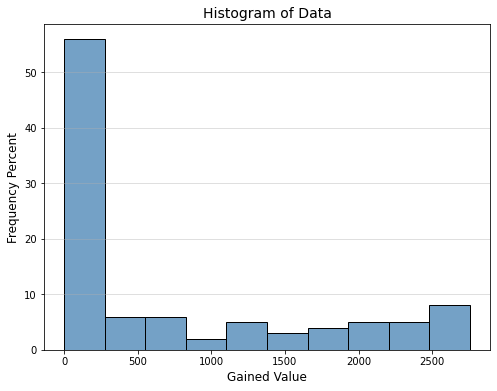

In [356]:
import matplotlib.pyplot as plt
import seaborn as sns
buyer_profits = [buyer.value_gained for buyer in buyers]

# Create histogram
plt.figure(figsize=(8, 6))
sns.histplot(buyer_profits, kde=False, color='steelblue', edgecolor='black', bins=10)

# Set x and y axis labels
plt.xlabel('Gained Value', fontsize=12)
plt.ylabel('Frequency Percent', fontsize=12)

# Set title and font size
plt.title('Histogram of Data', fontsize=14)

# Set tick font size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add grid
plt.grid(axis='y', alpha=0.5)

# Show plot
plt.show()



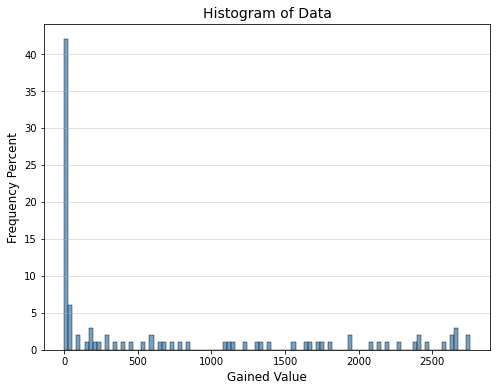

In [357]:
plt.figure(figsize=(8, 6))
sns.histplot(buyer_profits, kde=False, color='steelblue', edgecolor='black', bins=100)

# Set x and y axis labels
plt.xlabel('Gained Value', fontsize=12)
plt.ylabel('Frequency Percent', fontsize=12)

# Set title and font size
plt.title('Histogram of Data', fontsize=14)

# Set tick font size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add grid
plt.grid(axis='y', alpha=0.5)

# Show plot
plt.show()


# Auction Based


In [358]:
def auction_simulate(buyers, sellers, num_days):
  for i in range(num_days):
    random.shuffle(buyers)
    random.shuffle(sellers)
    for seller in sellers:
      bids = sorted([(buyer, buyer.preferred_price)for buyer in buyers], key=lambda x: -x[1])
      buyer, price = bids[0]
      if price > seller.min_price:
        # auction was successfull 
        #print(f"{buyer.name} buys from {seller.name} with {price} $")
        seller.update_preferred_price(1)
        buyer.update_preferred_price(-1)
        seller.update_value_gained(price)
        buyer.update_value_gained(price)
      else:
        seller.update_preferred_price(-1)
        buyer.update_preferred_price(1)
  for buyer in buyers:
    print(buyer)
  for seller in sellers:
    print(seller)


In [359]:
sellers = [Seller(f's{i}', i) for i in range(100)]
buyers = [Buyer(f'b{i}', i+1) for i in range(100)]
auction_simulate(buyers, sellers, 100)

I am b7 my total gained value: 0, my preferred price 8
I am b97 my total gained value: 7020, my preferred price 46
I am b65 my total gained value: 1044, my preferred price 46
I am b43 my total gained value: 0, my preferred price 44
I am b4 my total gained value: 0, my preferred price 5
I am b79 my total gained value: 1477, my preferred price 46
I am b92 my total gained value: 3138, my preferred price 46
I am b57 my total gained value: 343, my preferred price 46
I am b2 my total gained value: 0, my preferred price 3
I am b77 my total gained value: 1429, my preferred price 46
I am b20 my total gained value: 0, my preferred price 21
I am b87 my total gained value: 5424, my preferred price 46
I am b52 my total gained value: 109, my preferred price 46
I am b56 my total gained value: 669, my preferred price 46
I am b96 my total gained value: 4721, my preferred price 46
I am b0 my total gained value: 0, my preferred price 1
I am b89 my total gained value: 6745, my preferred price 46
I am b14 

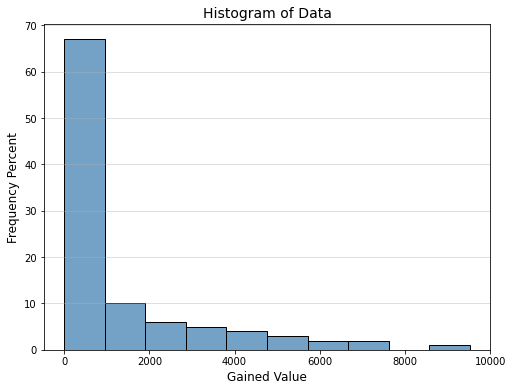

In [360]:
buyer_profits = [buyer.value_gained for buyer in buyers]

# Create histogram
plt.figure(figsize=(8, 6))
sns.histplot(buyer_profits, kde=False, color='steelblue', edgecolor='black', bins=10)

# Set x and y axis labels
plt.xlabel('Gained Value', fontsize=12)
plt.ylabel('Frequency Percent', fontsize=12)

# Set title and font size
plt.title('Histogram of Data', fontsize=14)

# Set tick font size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add grid
plt.grid(axis='y', alpha=0.5)

# Show plot
plt.show()

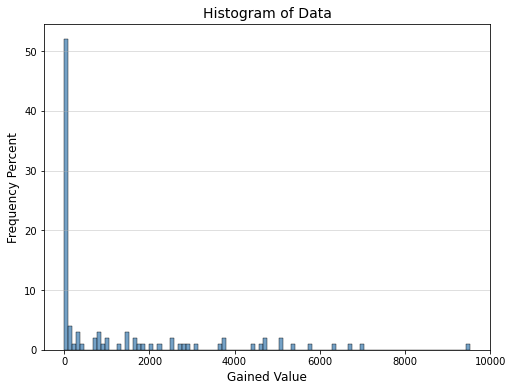

In [361]:
buyer_profits = [buyer.value_gained for buyer in buyers]

# Create histogram
plt.figure(figsize=(8, 6))
sns.histplot(buyer_profits, kde=False, color='steelblue', edgecolor='black', bins=100)

# Set x and y axis labels
plt.xlabel('Gained Value', fontsize=12)
plt.ylabel('Frequency Percent', fontsize=12)

# Set title and font size
plt.title('Histogram of Data', fontsize=14)

# Set tick font size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add grid
plt.grid(axis='y', alpha=0.5)

# Show plot
plt.show()

#one-to-one auction

In [362]:
def one2one_auction_simulate(buyers, sellers, num_days):
  for i in range(num_days):
    random.shuffle(buyers)
    random.shuffle(sellers)
    remained_buyers = buyers.copy()
    for seller in sellers:
      bids = sorted([(buyer, buyer.preferred_price)for buyer in remained_buyers], key=lambda x: -x[1])
      buyer, price = bids[0]
      if price > seller.min_price:
        # auction was successfull 
        #print(f"{buyer.name} buys from {seller.name} with {price} $")
        seller.update_preferred_price(1)
        buyer.update_preferred_price(-1)
        seller.update_value_gained(price)
        buyer.update_value_gained(price)
        remained_buyers.remove(buyer)
      else:
        seller.update_preferred_price(-1)
        buyer.update_preferred_price(1)
  for buyer in buyers:
    print(buyer)
  for seller in sellers:
    print(seller)


In [363]:
sellers = [Seller(f's{i}', i) for i in range(100)]
buyers = [Buyer(f'b{i}', i+1) for i in range(100)]
one2one_auction_simulate(buyers, sellers, 100)

I am b94 my total gained value: 2589, my preferred price 54
I am b64 my total gained value: 1098, my preferred price 44
I am b22 my total gained value: 0, my preferred price 23
I am b42 my total gained value: 24, my preferred price 41
I am b99 my total gained value: 3360, my preferred price 48
I am b30 my total gained value: 0, my preferred price 31
I am b39 my total gained value: 4, my preferred price 38
I am b83 my total gained value: 2286, my preferred price 56
I am b37 my total gained value: 0, my preferred price 37
I am b89 my total gained value: 2754, my preferred price 54
I am b8 my total gained value: 0, my preferred price 9
I am b20 my total gained value: 0, my preferred price 21
I am b93 my total gained value: 2810, my preferred price 58
I am b13 my total gained value: 0, my preferred price 14
I am b95 my total gained value: 3009, my preferred price 50
I am b86 my total gained value: 2825, my preferred price 52
I am b72 my total gained value: 1674, my preferred price 50
I am 

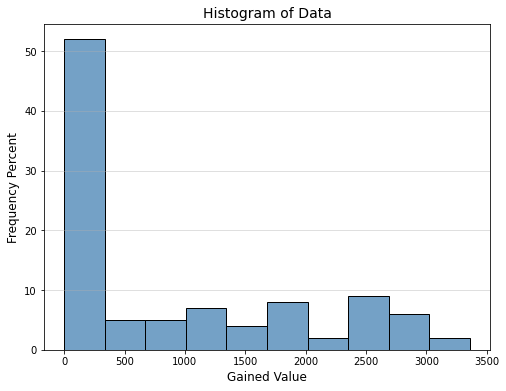

In [364]:
buyer_profits = [buyer.value_gained for buyer in buyers]

# Create histogram
plt.figure(figsize=(8, 6))
sns.histplot(buyer_profits, kde=False, color='steelblue', edgecolor='black', bins=10)

# Set x and y axis labels
plt.xlabel('Gained Value', fontsize=12)
plt.ylabel('Frequency Percent', fontsize=12)

# Set title and font size
plt.title('Histogram of Data', fontsize=14)

# Set tick font size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add grid
plt.grid(axis='y', alpha=0.5)

# Show plot
plt.show()

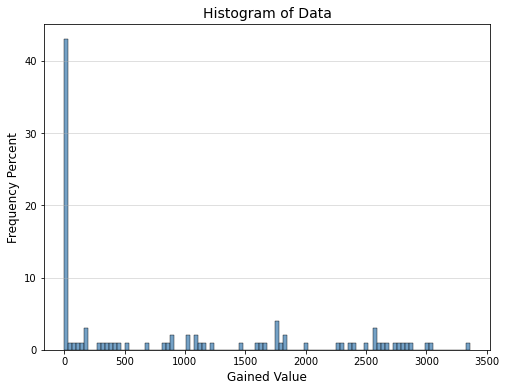

In [365]:
buyer_profits = [buyer.value_gained for buyer in buyers]

# Create histogram
plt.figure(figsize=(8, 6))
sns.histplot(buyer_profits, kde=False, color='steelblue', edgecolor='black', bins=100)

# Set x and y axis labels
plt.xlabel('Gained Value', fontsize=12)
plt.ylabel('Frequency Percent', fontsize=12)

# Set title and font size
plt.title('Histogram of Data', fontsize=14)

# Set tick font size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add grid
plt.grid(axis='y', alpha=0.5)

# Show plot
plt.show()